In [ ]:
"gausian bllur"
import numpy as np
from PIL import Image
from scipy.signal import convolve2d

def gaussian_kernel(size: int, sigma: float):
    """Generate a (size x size) Gaussian kernel."""
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    return kernel / np.sum(kernel)

def apply_gaussian_blur(image_array, kernel_size=5, sigma=1.0):
    """Apply Gaussian blur to an image array."""
    kernel = gaussian_kernel(kernel_size, sigma)
    
    if image_array.ndim == 3: 
        blurred = np.zeros_like(image_array)
        for c in range(3):  
            blurred[..., c] = convolve2d(image_array[..., c], kernel, mode='same', boundary='symm')
        return blurred.astype(np.uint8)
    else: 
        blurred = convolve2d(image_array, kernel, mode='same', boundary='symm')
        return blurred.astype(np.uint8)


image = Image.open("image.jpg")
image_array = np.array(image)
blurred_array = apply_gaussian_blur(image_array, kernel_size=31, sigma=3.0)
blurred_image = Image.fromarray(blurred_array)

blurred_image.save("gus2.jpg")

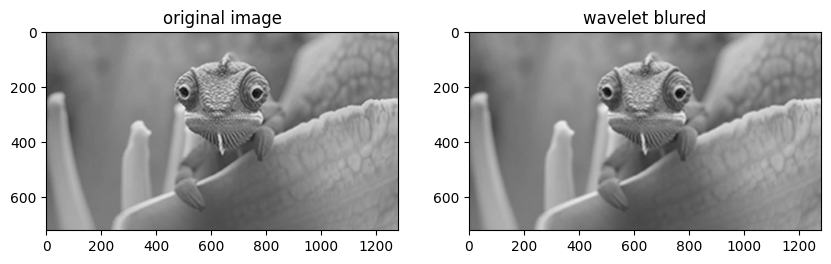

In [ ]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt


image = cv2.imread('MainBefore.jpg', cv2.IMREAD_GRAYSCALE)


coeffs2 = pywt.dwt2(image, 'haar')


LL, (LH, HL, HH) = coeffs2


LL_blurred = cv2.GaussianBlur(LL, (5, 5), 0)

blurred_image = pywt.idwt2((LL_blurred, (LH, HL, HH)), 'haar')


blurred_image = np.uint8(blurred_image)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('original image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('wavelet blured')
plt.imshow(blurred_image, cmap='gray')

plt.show()


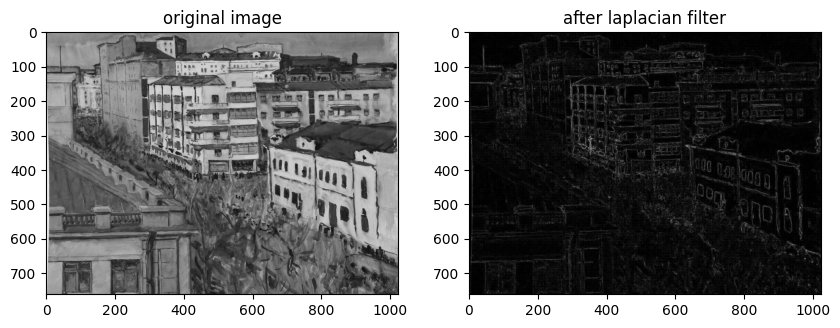

In [20]:
"edge recognition laplace filter" 
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)


laplacian = cv2.Laplacian(image, cv2.CV_64F)


laplacian_abs = cv2.convertScaleAbs(laplacian)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('original image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('after laplacian filter')
plt.imshow(laplacian_abs, cmap='gray')

plt.show()


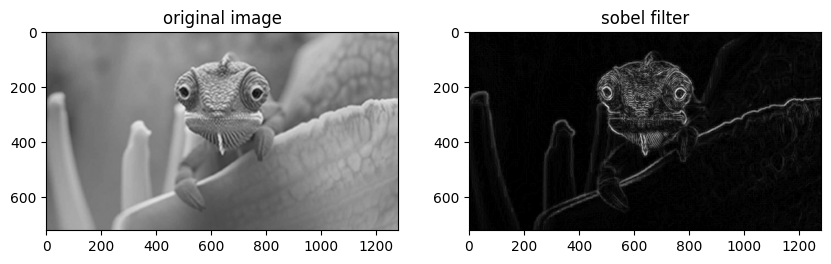

In [22]:
"edge recognition sobel filter"
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('MainBefore.jpg', cv2.IMREAD_GRAYSCALE)

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)


sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)

sobel_magnitude = cv2.convertScaleAbs(sobel_magnitude)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('original image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('sobel filter')
plt.imshow(sobel_magnitude, cmap='gray')

plt.show()
 

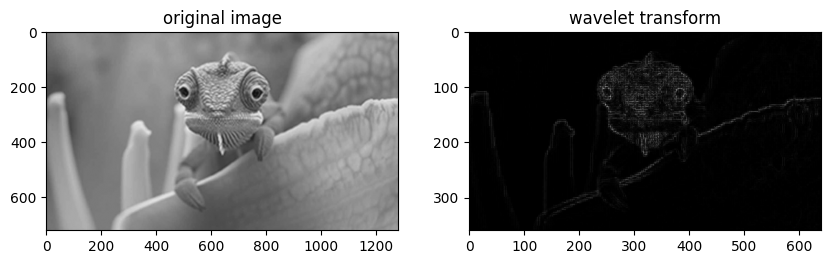

In [ ]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt


image = cv2.imread('MainBefore.jpg', cv2.IMREAD_GRAYSCALE)


coeffs2 = pywt.dwt2(image, 'haar')  


LL, (LH, HL, HH) = coeffs2


edges = np.abs(LH) + np.abs(HL) + np.abs(HH)


edges = np.uint8(edges)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('original image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('wavelet transform')
plt.imshow(edges, cmap='gray')

plt.show()
